# ISTA algorithm for solving y = x

In [1]:
import time
from math import sqrt
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
#L=3
#print(X)
#print(B)
# print(b)
#soft threshold function for sparsity

def soft_thresh(x, l):
    return np.sign(x) * np.maximum(np.abs(x) - l, 0.)


def ista(A, b, l, maxit):
    x= np.array([[0], [0]])
    loss= []
    time0 = time.time()
#     print(time0)
    
    b0=[]
    b1=[]
    #print(x.shape)
    A_T = A.transpose()
    #print(A_T)
    L = linalg.norm(A) **2
    #print(L)
    for _ in range(maxit):
        x = soft_thresh(x - (np.dot(A_T , (np.dot(A,x)  - b)))* (1/L) , l/L)
        this_loss = 0.5 * linalg.norm(A.dot(x) - b) ** 2 + l * linalg.norm(x, 1)
        loss.append((time.time() - time0, this_loss))
        #print(pobj)
        b0.append(x[0])
        b1.append(x[1])
    #print('This is b0 ' , b0)
    #print('This is b1 ' , b1)
    times, cost = map(np.array, zip(*loss))
    #print('The value of B0 and B1 is : ')
    return x , b0 , b1, cost, times

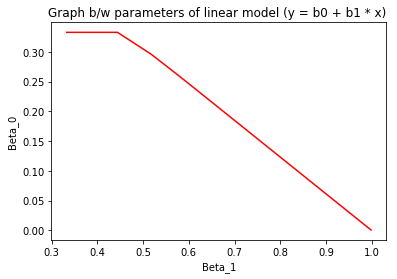

In [2]:
A = np.array([[1,0], [1,1]])
#print(np.abs(A) - 1)
b = np.array([[0], [1]])
#print(b)
# X = np.squeeze(np.array([[1,0], [1,1]]))
# y = np.squeeze(np.array([[0],[1]]))
l=0.001
x, b0, b1, cost, times = ista(A, b, l, 50)
plt.plot(b1, b0 , 'r')
plt.title('Graph b/w parameters of linear model (y = b0 + b1 * x) ')
plt.xlabel('Beta_1')
plt.ylabel('Beta_0')
plt.show()

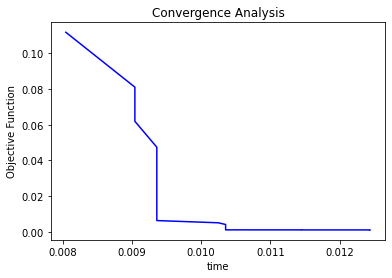

In [3]:
plt.plot(times,cost,'b')
plt.title('Convergence Analysis')
plt.xlabel('time')
plt.ylabel('Objective Function')
plt.show()

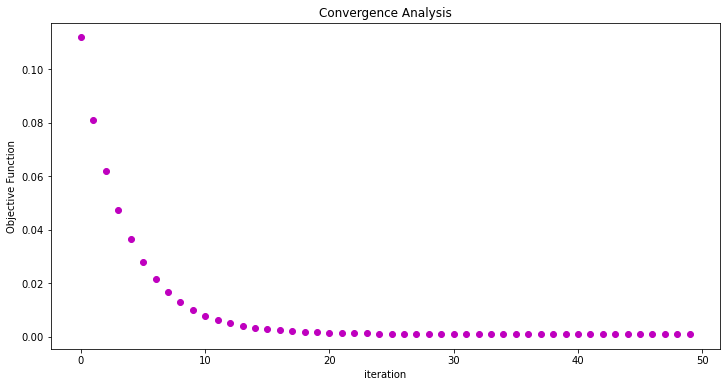

In [4]:
fig = plt.figure( figsize = (12,6))
itr  = np.arange(50)
plt.scatter(itr,cost, c = 'm')
plt.title('Convergence Analysis')
plt.xlabel('iteration')
plt.ylabel('Objective Function')
plt.show()

In [5]:
b0[9]

array([0.1144513])

In [77]:
for _ in range(50):
    b_df= []
    b_df.append(b0[i+1] - b0[i])
        

IndexError: list index out of range

In [8]:
def fista(A, b, l, maxit):
    x= np.array([[0], [0]])
    t = 1
    z = x.copy()
    L = linalg.norm(A) ** 2
    A_T = A.transpose()
    for _ in range(maxit):
        xold = x.copy()
        z = z - (np.dot(A_T , (np.dot(A,z)  - b)))/L
        x = soft_thresh(z, l / L)
        t0 = t
        t = (1. + sqrt(1. + 4. * t ** 2)) / 2.
        z = x + ((t0 - 1.) / t) * (x - xold)
    return x

In [9]:
A = np.array([[1,0], [1,1]])
#print(np.abs(A) - 1)
b = np.array([[0], [1]])
#print(b)
# X = np.squeeze(np.array([[1,0], [1,1]]))
# y = np.squeeze(np.array([[0],[1]]))
l=0.001
fista(A, b, l, 9)

array([[0.01255377],
       [0.97869003]])

In [10]:
time0 = time.time()
pobj = []
this_pobj = 0.5 * linalg.norm(A.dot(x) - b) ** 2 + l * linalg.norm(x, 1)
pobj.append((time.time() - time0, this_pobj))
times, pobj = map(np.array, zip(*pobj))



In [11]:
pobj

array([0.00099967])

In [12]:
xx, yy = np.meshgrid(np.linspace(-2,2,100),np.linspace(-2,2,100))
def costfunction(X,y,theta):
    '''OLS cost function'''
    #Initialisation of useful values 
    m = np.size(y)
    
    #Cost function in vectorized form
    h = X @ theta
    J = float((1./(2*m)) * (h - y).T @ (h - y));    
    return J;


def cost_l1(x,y):
    '''L1 cost function'''
    return np.abs(x) + np.abs(y)
zz_l1 = np.array(  [cost_l1(xi, yi )for xi, yi in zip(np.ravel(xx), np.ravel(yy)) ] ) #L1 function
zz_ls = np.array(  [costfunction(A, b.reshape(-1,1),np.array([t0,t1]).reshape(-1,1)) 
                     for t0, t1 in zip(np.ravel(xx), np.ravel(yy)) ] ) #least square cost function

In [13]:
Z_l1 = zz_l1.reshape(xx.shape)
Z_ls = zz_ls.reshape(xx.shape)
min_ls = np.linalg.inv(A.T@A)@A.T@b
min_l1 = np.array([0.,0.])


<ipython-input-14-1d8bd7d7ce00>:5: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(xx, yy, Z_l1, levels = [.5,1,2,3,4,5,6,8,10,12,14],  cmap = 'gist_gray', label = 'l_1')
<ipython-input-14-1d8bd7d7ce00>:6: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(xx, yy, Z_ls, levels = [.01,.06,.09,.11,.15], cmap = 'coolwarm', label = 'least squares')


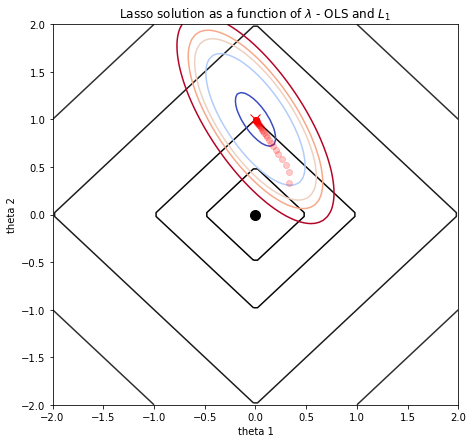

In [14]:
#Plotting the contours - L1 
fig = plt.figure(figsize = (16,7))

ax = fig.add_subplot(1, 2, 2)
ax.contour(xx, yy, Z_l1, levels = [.5,1,2,3,4,5,6,8,10,12,14],  cmap = 'gist_gray', label = 'l_1')
ax.contour(xx, yy, Z_ls, levels = [.01,.06,.09,.11,.15], cmap = 'coolwarm', label = 'least squares')
ax.set_xlabel('theta 1')
ax.set_ylabel('theta 2')
ax.set_title('Lasso solution as a function of $\\lambda$ - OLS and $L_1$ ')

#Plotting the minimum - L1
ax.plot(min_ls[0],min_ls[1], marker = 'x', color = 'red', markersize = 10)
ax.plot(0,0, marker = 'o', color = 'black', markersize = 10)

#Plotting the path of L1 regularized minimum
ax.plot(b0,b1, linestyle = 'none', marker = 'o', color = 'red', alpha = .2)

plt.show()